### HMC code ###

Two main steps in HMC:

* Values of velocity are randomly drawn and assigned to atoms
* Hamiltonian Dynamics (in the form of verlet algorithm) are used to propose a new state which is accepted or rejected

**Acceptance Test**

From MCMC using Hamiltonian Dynamics, Steve Brooks, Andrew Gelman, Galin Jones, Xiao-Li Meng

The proposed state is accepted as the next state with probablility

$$\min\left[1,\exp(-H(q*, p*) + H(q,p))\right]\,=\,\min\left[1,\exp(-U(q*) + U(q) - K(p*) + K(p))\right]$$

The \* denotes the proposed state 

Metropolis-Hastings algorithm is used for acceptance.

**Things I need to do:**

* Work out how to generate random numbers from a distribution and assign them to variables
* Verlet

**Velocity Verlet Integrator**

$\mathbf{r}$ (position) and $\mathbf{v}$ (velocity) at time *t* are used to integrate equations of motion

$$\mathbf{v}(t + 0.5\Delta t) = \mathbf{v}(t) + \frac{\Delta t}{2m}\mathbf{F}(t)$$

$$\mathbf{r}(t + \Delta t) = \mathbf{r}(t) + \Delta t \mathbf{v}(t + 0.5\Delta t)$$

$$\mathbf{v}(t + \Delta t) = \mathbf{v}(t + 0.5\Delta t) + \frac{\Delta t}{2m}\mathbf{F}(t + \Delta t)$$

$\frac{\mathbf{F}(t)}{m}$ is equivalent to the acceleration

**Boltzmann Distribution**

$$P(q, p) = \frac{1}{Z}\exp(-U(q)/T)\exp(-K(p)/T)$$

In [17]:
# I'm going to write out each stage as different functions before combining to get a complete algorithm that works

# Main stages of HMC:
# Momentum values are randomly drawn from distribution
# verlet simulated for L steps with stepsize dt which proposes a new state
# L and dt are parameters that need to be specified
# New state is either accepted or rejected, if min < 1 state is accepted
import numpy as np
from math import exp, sqrt


q = 10
# m = 1  # mass
L = 35  # number of verlet steps
k_b = 1.381 * (10 ** -23)  # Boltzmann constant in J K^-1
T = 298  # Temperature in K
sigma = sqrt(float(k_b * T) / m)

def sample():
    """Picks a random value for the velocity variable"""
    # mean 1, need to calculate the standard deviation
    # sigma = sqrt(kT/m)
    v = sigma * np.random.randn() + 1  # sigma * np.random.randn() + mu
    return v

    p = m * v

def K_init(p):
    """Initial kinetic energy"""
    K = float(p ** 2) / (2 * m)
    return K


def U_init(q):
    """Initial potential energy"""  # This depends on the system being tested
    return U

def verlet(v, q, t, L):
    for l in range(L):
        v = v + (t / (2 * m)) * F(t)
        q = q + (t * v)
        v = v + (t / (2 * m))
    return q
    return v


def K_prop(p_new):  # should be a sum from i=1 to i=d
    """Calculates the kinetic energy at the drawn momentum"""
    K = float(p_new ** 2) / (2 * m)
    return K


def U_prop(q_new):  # -ve integral of the force?
    """Calculates the potential energy"""
    # code here   
    return U

def accept():  # accepted when min < 1, intial q and p reassigned
    if min(1, exp(-U_prop(q_new) + U_init(q) - K_prop(p_new) + K_init(p))) != 1:  
        p = p_new
        q = q_new
        print 'Proposed State Accepted'
        return p
        return q
    else:  # rejected when 1 is the minimum
        p = p
        q = q
        print 'Proposed State Rejected'
        return p
        return q

In [243]:
import numpy as np
from math import exp, sqrt

# q = postition, m = mass, L = number of verlet loops, T = temperature, dt = time step in the verlet: default 0.01, 
# Tot = number of loops: default 100

def HMC(q, m, L, T, dt=0.01, Tot=100):
    accepted = 0  # counts the number of accepted steps
    rejected = 0  # coutns the number of rejected steps
    k_b = 1.381 * (10 ** -23)  # Boltzmann constant
    for tot in range(Tot):
        sigma = sqrt(float(k_b * T) / m)  # standard deviation
        v = sigma * np.random.randn()
        q_0 = q  # this stores the original q value for use again if rejected
        p = m * v  # calculates momentum for kinetic energy calculation
        print "Initial q =", q

        K_init = float(p ** 2) / (m)
        U_init = U(q)  # need to have force defined to calculate this
        H_init = K_init + U_init

        for l in range(L): # this loops L times
            v = v + ((dt / (2 * m)) * F(q))
            q = q + (dt * v)
            v = v + ((dt / (2 * m)) * F(q))
        v_new = v
        q_new = q
        print 'The proposed position is', q_new
        print 'The proposed velocity is', v_new

        p_new = -m * v_new  # negate the momentum as it says in the MCMC using HD article

        K_prop = float(p_new ** 2) / (2 * m)
        U_prop = U(q_new)  # need to have force defined to calculate this
        H_prop = K_prop + U_init
        
        # this is the probability of acceptance not the acceptance test
        if min(1, exp(-H_prop + H_init)) != 1:
            q = q_new
            accepted = accepted + 1
            print("\x1b[32m\'Proposed State Accepted\'\x1b[0m")
        else:  # rejected when 1 is the minimum
            q = q_0
            rejected = rejected + 1
            print("\x1b[31m\'Proposed State Rejected\'\x1b[0m")
    print "Accepted", accepted, "times"
    print "Rejected", rejected, "times"

In [23]:
# For a Harmonic Oscillator F = -kx and U = 0.5k(x**2)
def F(q, m=1, k=10):
    f = -k * q
    # f = 9.81 * m
    return f

def U(q, k=10):
    u = 0.5 * k * (q ** 2)
    # u = 9.81 * m * q
    return u

In [245]:
HMC(10, 1, 35, 500)

Initial q = 10
The proposed position is 4.47486746113
The proposed velocity is -28.2764154933
'Proposed State Accepted'
Initial q = 4.47486746113
The proposed position is 2.00244387947
The proposed velocity is -12.6533211608
'Proposed State Accepted'
Initial q = 2.00244387947
The proposed position is 0.896067095919
The proposed velocity is -5.66219351375
'Proposed State Accepted'
Initial q = 0.896067095919
The proposed position is 0.400978149049
The proposed velocity is -2.53375655141
'Proposed State Accepted'
Initial q = 0.400978149049
The proposed position is 0.179432407171
The proposed velocity is -1.13382247464
'Proposed State Accepted'
Initial q = 0.179432407171
The proposed position is 0.0802936240474
The proposed velocity is -0.507370529789
'Proposed State Accepted'
Initial q = 0.0802936240474
The proposed position is 0.0359303325053
The proposed velocity is -0.227041587587
'Proposed State Accepted'
Initial q = 0.0359303325053
The proposed position is 0.0160783475488
The propose

The dt values were changed keeping using the parameters below:

* q = 10
* m = 1
* L = 35
* T = 500

$$\begin{array}{rr} \hline
dt &Accept &Reject \\ \hline
0.01 &28 &72 \\ \hline
0.02 &43 &57 \\ \hline
0.05 &71 &29 \\ \hline
0.001 &100 &0 \\ \hline
0.002 &100 &0 \\ \hline
0.005 &100 &0 \\ \hline
0.1 &11 &89 \\ \hline
0.2 &100 &0 \\ \hline
0.5 &36 &64 \\ \hline
\end{array}$$

* These are consistent each time it's run using the parameters specified above. Shouldn't this change because the values for v are being randomly drawn?
* As the time step decreases the acceptance should increase however this is not always the case which suggests I've done something wrong

In [15]:
import numpy as np
from math import exp, sqrt

# q = postition, m = mass, L = number of verlet loops, T = temperature, dt = time step in the verlet: default 0.01, 
# Tot = number of loops: default 100

def HMC(q, m, L, T, dt=0.01, Tot=100):
    accepted = 0  # counts the number of accepted steps
    rejected = 0  # coutns the number of rejected steps
    k_b = 1.381 * (10 ** -23)  # Boltzmann constant
    for tot in range(Tot):
        sigma = sqrt(float(k_b * T) / m)  # standard deviation
        v = sigma * np.random.randn()
        q_0 = q  # this stores the original q value for use again if rejected
        p = m * v  # calculates momentum for kinetic energy calculation
        print "Initial q =", q

        K_init = float(p ** 2) / (m)
        U_init = U(q)  # need to have force defined to calculate this
        H_init = K_init + U_init

        for l in range(L): # this loops L times
            v = v + ((dt / (2 * m)) * F(q))
            q = q + (dt * v)
            v = v + ((dt / (2 * m)) * F(q))
        v_new = v
        q_new = q
        print 'The proposed position is', q_new
        print 'The proposed velocity is', v_new

        p_new = -m * v_new  # negate the momentum as it says in the MCMC using HD article

        K_prop = float(p_new ** 2) / (2 * m)
        U_prop = U(q_new)  # need to have force defined to calculate this
        H_prop = K_prop + U_prop
        
        # this is the probability of acceptance not the acceptance test
        alpha = min(1, exp(-H_prop + H_init))
        unif = np.random.randn()
        
        if alpha >= unif:
            q = q_new
            accepted = accepted + 1
            print("\x1b[32m\'Proposed State Accepted\'\x1b[0m")
        else:  # rejected when 1 is the minimum
            q = q_0
            rejected = rejected + 1
            print("\x1b[31m\'Proposed State Rejected\'\x1b[0m")
    print "Accepted", accepted, "times"
    print "Rejected", rejected, "times"

In [16]:
HMC(10, 1, 35, 500)

Initial q = 10
Proposed position = 4.47486746114
Proposed velocity = -28.2764154933
'Proposed State Accepted'
Initial q = 4.47486746114
Proposed position = 2.00244387948
Proposed velocity = -12.6533211609
'Proposed State Accepted'
Initial q = 2.00244387948
Proposed position = 0.896067095929
Proposed velocity = -5.66219351378
'Proposed State Accepted'
Initial q = 0.896067095929
Proposed position = 0.400978149047
Proposed velocity = -2.53375655145
'Proposed State Accepted'
Initial q = 0.400978149047
Proposed position = 0.179432407146
Proposed velocity = -1.13382247467
'Proposed State Accepted'
Initial q = 0.179432407146
Proposed position = 0.0802936240409
Proposed velocity = -0.507370529712
'Proposed State Accepted'
Initial q = 0.0802936240409
Proposed position = 0.0359303325673
Proposed velocity = -0.227041587466
'Proposed State Accepted'
Initial q = 0.0359303325673
Proposed position = 0.0160783475646
Proposed velocity = -0.101598101316
'Proposed State Accepted'
Initial q = 0.0160783475

dt = 0.01
* Accept = 80, 78, 85, 84, 81

dt = 0.02
* Accept = 83, 75, 73, 78, 84

dt = 0.05
* Accept = 81, 81, 82, 83, 84

dt = 0.1
* Accept = 83, 81, 80, 84, 86

Using a smaller time step here reduces the number of accepted proposals, so something is still wrong

In [29]:
import numpy as np
from math import exp, sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# q = postition 
# L = number of verlet loops
# dt = time step in the verlet: default 0.01 
# Tot = number of loops: default 100

def HMC(q, L, m=1, dt=0.01, Tot=100, kT=1):
    accepted = 0  # counts accepted steps
    rejected = 0  # coutns rejected steps
    atrj = []
    prob_trj = []
    for tot in range(Tot):
        sigma = np.sqrt(kT/m)
        v = np.random.normal(0, sigma)  # this is a gaussian with m=0 sd=sigma
        prob_trj.append(v)
        q_0 = q  # stores original q for use again if rejected
        p = m * v  # calculates momentum for kinetic energy calculation
        print "Initial q =", q

        K_init = float(p ** 2) / (2 * m)
        U_init = U(q)  # need to have force defined to calculate this
        H_init = K_init + U_init

        for l in range(L): # this loops L times
            v = v + ((dt / (2 * m)) * F(q))
            q = q + (dt * v)
            v = v + ((dt / (2 * m)) * F(q))
        v_new = v
        q_new = q
        print 'Proposed position =', q_new
        print 'Proposed velocity =', v_new
        
        p_new = m * v_new

        K_prop = float(p_new ** 2) / (2 * m)
        U_prop = U(q_new)  # need to have force defined to calculate this
        H_prop = K_prop + U_prop
        
        # Probability of q_new
        a = min(1, exp(-(H_prop - H_init)/kT)) #exp(-beta H) where H is H_prop - H_init

        if np.random.uniform(0, 1) > a:
            rejected = rejected + 1
            atrj.append(0)
            q = q_0
            print("\x1b[31m\'Proposed State Rejected\'\x1b[0m")
        else:
            accepted = accepted + 1
            atrj.append(1)
            print("\x1b[32m\'Proposed State Accepted\'\x1b[0m")
    print "Accepted", accepted, "times"
    print "Rejected", rejected, "times"
    
    plt.hist(atrj, 2, edgecolor='black');

Initial q = 10
Proposed position = 5.75934942381
Proposed velocity = -15.843176578
'Proposed State Accepted'
Initial q = 5.75934942381
Proposed position = 4.10561181579
Proposed velocity = -8.12200194614
'Proposed State Accepted'
Initial q = 4.10561181579
Proposed position = 2.53640532711
Proposed velocity = -6.28611383622
'Proposed State Accepted'
Initial q = 2.53640532711
Proposed position = 1.50552102129
Proposed velocity = -3.96161857112
'Proposed State Accepted'
Initial q = 1.50552102129
Proposed position = 0.694222316206
Proposed velocity = -2.60499961412
'Proposed State Accepted'
Initial q = 0.694222316206
Proposed position = 0.699262920552
Proposed velocity = -0.719162123577
'Proposed State Accepted'
Initial q = 0.699262920552
Proposed position = 0.935292165066
Proposed velocity = -0.430748623461
'Proposed State Rejected'
Initial q = 0.699262920552
Proposed position = 0.735380906003
Proposed velocity = -0.684918188854
'Proposed State Rejected'
Initial q = 0.699262920552
Propose

Proposed position = -0.607787242654
Proposed velocity = -0.872630266028
'Proposed State Accepted'
Initial q = -0.607787242654
Proposed position = -1.16235747114
Proposed velocity = -0.0698545713378
'Proposed State Rejected'
Initial q = -0.607787242654
Proposed position = -0.804859409167
Proposed velocity = 0.384672739769
'Proposed State Accepted'
Initial q = -0.804859409167
Proposed position = 0.365511946234
Proposed velocity = 2.32922799693
'Proposed State Accepted'
Initial q = 0.365511946234
Proposed position = 0.380057047352
Proposed velocity = -0.363524287744
'Proposed State Accepted'
Initial q = 0.380057047352
Proposed position = 0.0421414514755
Proposed velocity = -0.82684893644
'Proposed State Accepted'
Initial q = 0.0421414514755
Proposed position = -0.0377758596822
Proposed velocity = -0.145652227427
'Proposed State Accepted'
Initial q = -0.0377758596822
Proposed position = -0.256504355048
Proposed velocity = -0.238612347961
'Proposed State Accepted'
Initial q = -0.25650435504

'Proposed State Accepted'
Initial q = 0.154137206712
Proposed position = -0.955867073984
Proposed velocity = -1.57237018477
'Proposed State Rejected'
Initial q = 0.154137206712
Proposed position = 0.504342080386
Proposed velocity = 0.284157195878
'Proposed State Rejected'
Initial q = 0.154137206712
Proposed position = -0.894873747844
Proposed velocity = -1.49482254053
'Proposed State Rejected'
Initial q = 0.154137206712
Proposed position = -0.251998443714
Proposed velocity = -0.677463191093
'Proposed State Accepted'
Initial q = -0.251998443714
Proposed position = -0.0825013634125
Proposed velocity = 0.478878368892
'Proposed State Accepted'
Initial q = -0.0825013634125
Proposed position = -0.464269876531
Proposed velocity = -0.399158235471
'Proposed State Accepted'
Initial q = -0.464269876531
Proposed position = 0.0548667827633
Proposed velocity = 1.14527113022
'Proposed State Accepted'
Initial q = 0.0548667827633
Proposed position = -0.115563913542
Proposed velocity = -0.274031987514
'

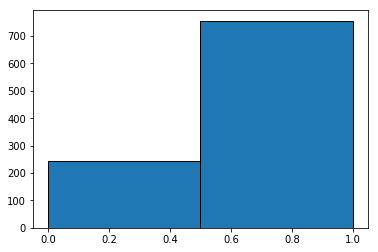

In [30]:
HMC(10, 35, dt=0.5, Tot=1000)

The following parameters were used to test the HMC:

q = 10
L = 35
Tot = 1000
All other parameters were kept as their default value apart from dt which was changed

$$\begin{array}{rr} \hline
dt &Accept & & & & &Avg Accept &Percentage \\ \hline
0.001 &1000 &1000 &1000 &1000 &1000 &1000 &100 \\ \hline
0.0025 &1000 &1000 &1000 &1000 &1000 &1000 &100 \\ \hline
0.005 &1000 &1000 &1000 &1000 &1000 &1000 &100 \\ \hline
0.0075 &1000 &1000 &1000 &1000 &1000 &1000 &100 \\ \hline
0.01 &1000 &1000 &1000 &1000 &1000 &1000 &100 \\ \hline
0.025 &1000 &1000 &1000 &1000 &1000 &1000 &100 \\ \hline
0.05 &1000 &1000 &998 &998 &997 &998.6 &99.86 \\ \hline
0.075 &996 &1000 &995 &995 &994 &996 &99.6 \\ \hline
0.1 &994 &991 &998 &994 &989 &993.2 &99.32 \\ \hline
0.25 &988 &990 &988 &993 &987 &989.2 &98.92 \\ \hline
0.5 &736 &730 &756 &735 &729 &737.2 &73.72 \\ \hline
0.75 &0 &0 &0 &0 &0 &0 &0 \\ \hline
\end{array}$$

The acceptance rate decreased as the time step increased. This is what is expected. Why?

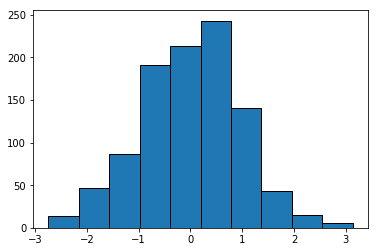

In [31]:
plt.hist(prob_trj, edgecolor='black');  # The histogram of the distribution which v is drawn from